# Insights City Supply and Demand

This is a simulated take-home assignment in the recruitment process for data science positions.


## Assignment

1. Which date had the most completed trips during the two week period?
2. What was the highest number of completed trips within a 24 hour period?
3. Which hour of the day had the most requests during the two week period?
4. What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)? Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)
5. What is the weighted average ratio of completed trips per driver during the two week period? Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.
6. In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.
7. True or False: Driver supply always increases when demand increases during the two week period. Tip: Visualize the data to confirm your answer if needed.
8. In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?
9. If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to? Hint: Consider both rider eyeballs and driver supply when choosing
10. True or False: There is exactly two weeks of data in this analysis
11. Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums) Tip: Visualize the data to confirm your answer if needed.

## Data Description
Use the dataset from the file `dataset_1.csv`. Consider the row 11 from this dataset:

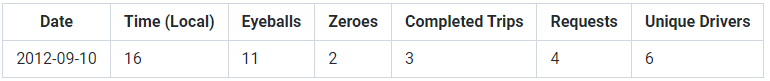


This means that during the hour beginning at 4pm (hour 16), on September 10th, 2012:
- 11 people opened the Uber app (`Eyeballs`). 
- 2 of them did not see any car (`Zeroes`).
- 4 of them requested a car (`Requests`). 
- Of the 4 requests, only 3 complete trips actually resulted (`Completed Trips`). 
- During this time, there were a total of 6 drivers who logged in (`Unique Drivers`).

In [1]:
import pandas as pd

df = pd.read_csv('dataset_1.csv')
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.head()

,date,time_(local),eyeballs,zeroes,completed_trips,requests,unique_drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


In [2]:
df.isna().sum()

date               321
time_(local)         0
eyeballs             0
zeroes               0
completed_trips      0
requests             0
unique_drivers       0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             15 non-null     object
 1   time_(local)     336 non-null    int64 
 2   eyeballs         336 non-null    int64 
 3   zeroes           336 non-null    int64 
 4   completed_trips  336 non-null    int64 
 5   requests         336 non-null    int64 
 6   unique_drivers   336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [4]:
df.date.ffill(inplace=True)

df.isna().sum()

date               0
time_(local)       0
eyeballs           0
zeroes             0
completed_trips    0
requests           0
unique_drivers     0
dtype: int64

In [5]:
df.head()

,date,time_(local),eyeballs,zeroes,completed_trips,requests,unique_drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11


# 1. Which date had the most completed trips during the two week period?

22-Sep-12 had the most completed trips. With 248 completed trips.

In [6]:
most_trips = df.groupby('date')['completed_trips'].sum().reset_index().sort_values('completed_trips', ascending=False)
most_trips

,date,completed_trips
12,22-Sep-12,248
5,15-Sep-12,199
11,21-Sep-12,190
13,23-Sep-12,111
4,14-Sep-12,108
6,16-Sep-12,93
2,12-Sep-12,91
10,20-Sep-12,70
7,17-Sep-12,57
3,13-Sep-12,45


# 2. What was the highest number of completed trips within a 24 hour period?

In [7]:
df.head()

,date,time_(local),eyeballs,zeroes,completed_trips,requests,unique_drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11


In [8]:
df['date'] = pd.to_datetime(df.date)

In [9]:
# create timestamp by adding time_(local) to date column and converting to datetime format
def create_timestamp(date, time):
    return pd.to_datetime(f'{date} {time}:00')

df['timestamp'] = df.apply(lambda row: create_timestamp(row['date'], row['time_(local)']), axis=1)

In [11]:
df.set_index('timestamp').resample(rule='24H', offset='17H').sum()

,time_(local),eyeballs,zeroes,completed_trips,requests,unique_drivers
timestamp,,,,,,
2012-09-09 17:00:00,115,94,12,14,17,104
2012-09-10 17:00:00,276,255,40,23,31,116
2012-09-11 17:00:00,276,433,73,94,118,189
2012-09-12 17:00:00,276,324,79,45,67,158
2012-09-13 17:00:00,276,359,70,56,80,164
2012-09-14 17:00:00,276,707,152,169,208,204
2012-09-15 17:00:00,276,717,212,179,254,200
2012-09-16 17:00:00,276,318,77,40,59,147
2012-09-17 17:00:00,276,389,86,59,97,158


In [12]:
df.head()

,date,time_(local),eyeballs,zeroes,completed_trips,requests,unique_drivers,timestamp
0,2012-09-10,7,5,0,2,2,9,2012-09-10 07:00:00
1,2012-09-10,8,6,0,2,2,14,2012-09-10 08:00:00
2,2012-09-10,9,8,3,0,0,14,2012-09-10 09:00:00
3,2012-09-10,10,9,2,0,1,14,2012-09-10 10:00:00
4,2012-09-10,11,11,1,4,4,11,2012-09-10 11:00:00


# Reference

In [13]:
df_test = df[['date','timestamp', 'completed_trips']]
df_test = df_test.groupby('date').head(5).reset_index(drop=True)
df_test.drop('date', inplace=True, axis=1)

In [14]:
li = df_test.head(20).values.tolist()
li

[[Timestamp('2012-09-10 07:00:00'), 2],
 [Timestamp('2012-09-10 08:00:00'), 2],
 [Timestamp('2012-09-10 09:00:00'), 0],
 [Timestamp('2012-09-10 10:00:00'), 0],
 [Timestamp('2012-09-10 11:00:00'), 4],
 [Timestamp('2012-09-11 00:00:00'), 1],
 [Timestamp('2012-09-11 01:00:00'), 0],
 [Timestamp('2012-09-11 02:00:00'), 0],
 [Timestamp('2012-09-11 03:00:00'), 0],
 [Timestamp('2012-09-11 04:00:00'), 0],
 [Timestamp('2012-09-12 00:00:00'), 0],
 [Timestamp('2012-09-12 01:00:00'), 1],
 [Timestamp('2012-09-12 02:00:00'), 0],
 [Timestamp('2012-09-12 03:00:00'), 0],
 [Timestamp('2012-09-12 04:00:00'), 0],
 [Timestamp('2012-09-13 00:00:00'), 0],
 [Timestamp('2012-09-13 01:00:00'), 0],
 [Timestamp('2012-09-13 02:00:00'), 0],
 [Timestamp('2012-09-13 03:00:00'), 0],
 [Timestamp('2012-09-13 04:00:00'), 0]]